In [49]:
import numpy as np
import matplotlib.pyplot as plt

We want to plot a line $y = 2x + 1$

In [50]:
x = np.linspace(0, 10, 100)
y = 2 * x + 1

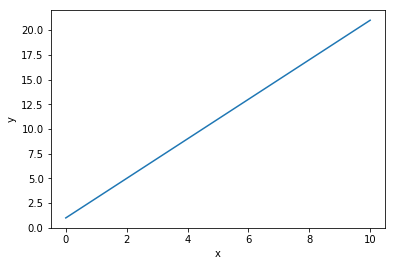

In [51]:
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We now create some noise $w_x$ and $w_y$.

In [54]:
w_x = np.random.normal(0, 1, 100)
w_y = np.random.normal(0, 1, 100)

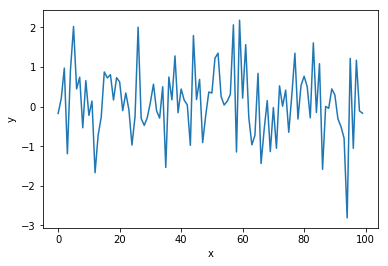

In [55]:
plt.figure()
plt.plot(w_y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We then inject the noise to the data to get $x = w_x + \tilde{x}$ and $y = w_y + \tilde{y}$, and then we plot it.

In [56]:
x_disturbed = x + w_x
y_disturbed = y + w_y

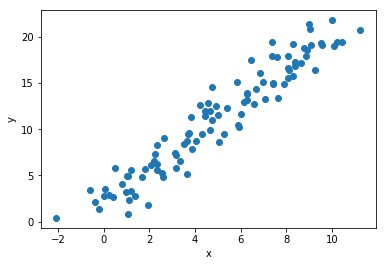

In [57]:
plt.figure()
plt.scatter(x_disturbed, y_disturbed)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now let's check if $\displaystyle f(x) = \bar{y} + \frac{\sigma_{xy}}{\sigma_{x}^x}(x - \bar{x})$ is truly a good fit to the data.

First we calculate the mean of the data $\bar{x}$ and $\bar{y}$

In [58]:
x_mean = np.mean(x_disturbed)
y_mean = np.mean(y_disturbed)

- Covariance can be calculated as $\displaystyle \frac{1}{N}\sum_{i=1}^{N}{(x_i - \bar{x})(y_i - \bar{y})}$;
- Variance can be calculated as $\displaystyle \sigma_x^2 = \frac{1}{N}\sum_{i=1}^{N}{(x_i - \bar{x})^2}$

In [59]:
covariance = np.mean((x_disturbed - x_mean) * (y_disturbed - y_mean))
x_variance = np.mean((x_disturbed - x_mean)**2)

And we have:
- $\displaystyle w_1 = \frac{\sigma_{xy}}{\sigma_{x}^2}$
- $w_0 = \bar{y} - w_1\bar{x}$

In [60]:
w1 = covariance/x_variance
w0 = y_mean - w1 * x_mean
print('w0: {}, w1: {}'.format(w0, w1))

w0: 2.330455119435225, w1: 1.7813856334008398


And now let us plot $f(x) = w_0 + w_1x$

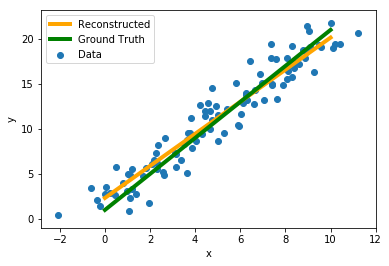

In [64]:
plt.figure()
plt.plot(x, w1*x+w0, color='orange', linewidth=4, label='Reconstructed')
plt.plot(x, 2*x+1, color='green', linewidth=4, label='Ground Truth')
plt.scatter(x_disturbed, y_disturbed, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()